c:\Users\Fahim Ahammed Firoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error (MSE): 0.05404955910695262
Root Mean Squared Error (RMSE): 0.2324856105374107


InvalidIndexError: (slice(None, None, None), 0)

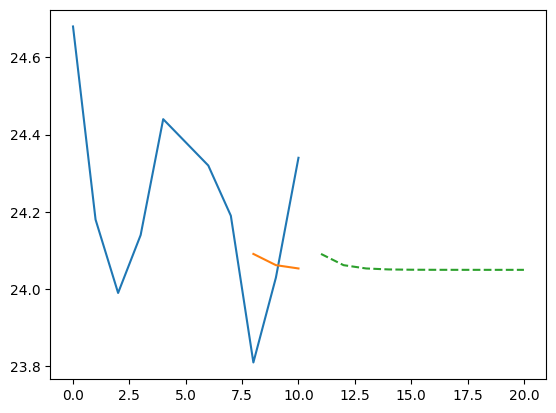

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('./data/timeseries.csv')

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)  
train, test = df[:train_size]['A'], df[train_size:]['A']


# b) Model Estimation
p, d, q = 1, 1, 1  # Replace with your identified values
model = sm.tsa.ARIMA(train, order=(p, d, q))
fit_model = model.fit()

# c) Model Evaluation
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# d) Forecasting
forecast_steps = 10  
forecast = fit_model.get_forecast(steps=forecast_steps)
forecast_index = range(len(train) + len(test), len(train) + len(test) + forecast_steps)

plt.plot(df['A'], label='Actual Data')
plt.plot(test.index, predictions, label='Predictions')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', linestyle='dashed')
plt.fill_between(forecast_index, forecast.conf_int()[:, 0], forecast.conf_int()[:, 1], color='gray', alpha=0.2, label='Confidence Intervals')
plt.legend()
plt.show()
